In [3]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import math
import numpy as np
from numpy.linalg import slogdet
import matplotlib.pyplot as plt
bempp.core.opencl_kernels.set_default_device(0,0)

In [4]:
N_wn = 5
lbound_wn = .05    
ubound_wn = 4      
quad_points = np.linspace(np.exp(-ubound_wn), np.exp(-lbound_wn), N_wn)

results_04 = np.empty(N_wn, dtype='float64')
results_02 = np.empty(N_wn, dtype='float64')
results_01 = np.empty(N_wn, dtype='float64')
results_005 = np.empty(N_wn, dtype='float64')

results_03 = np.empty(N_wn, dtype='float64')



N_Z = 15
lbound_Z = 0.5  # lower bound of Z
ubound_Z = 4.0  # upper bound of Z
surf_dist = np.linspace(lbound_Z, ubound_Z, N_Z)

casimir_energy_04 = np.empty(N_Z, dtype='float64')
casimir_energy_02 = np.empty(N_Z, dtype='float64')
casimir_energy_01 = np.empty(N_Z, dtype='float64')
casimir_energy_005 = np.empty(N_Z, dtype='float64')

casimir_energy_03 = np.empty(N_Z, dtype='float64')

In [5]:
h5 = 0.3 
for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h5, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h5, origin=(-((point1/2) + 1), 0, 0))

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_03[index2] = logdet
        
    casimir_energy_03[index1] = np.trapz(-results_03 / quad_points, quad_points) / (2 * np.pi)

In [7]:
h1 = 0.4 
for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h1, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h1, origin=(-((point1/2) + 1), 0, 0))

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_04[index2] = logdet
        
    casimir_energy_04[index1] = np.trapz(-results_04 / quad_points, quad_points) / (2 * np.pi)


In [8]:
h2 = 0.2
for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h2, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h2, origin=(-((point1/2) + 1), 0, 0))

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_02[index2] = logdet
        
    casimir_energy_02[index1] = np.trapz(-results_02 / quad_points, quad_points) / (2 * np.pi)

In [9]:
h3 = 0.1 
for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h3, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h3, origin=(-((point1/2) + 1), 0, 0))

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_01[index2] = logdet
        
    casimir_energy_01[index1] = np.trapz(-results_01 / quad_points, quad_points) / (2 * np.pi)

In [ ]:
h4 = 0.05
for index1, point1 in enumerate(surf_dist):

    sphere1 = bempp.api.shapes.sphere(h=h4, origin=((point1/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h4, origin=(-((point1/2) + 1), 0, 0))

    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        mat2 = np.real(np.block([[mat11,mat12_zero],[mat21_zero,mat22]]))
        combined = np.linalg.inv(mat2).dot(mat)
        sign, logdet = slogdet(combined)
        results_005[index2] = logdet
        
    casimir_energy_005[index1] = np.trapz(-results_005 / quad_points, quad_points) / (2 * np.pi)
    print(casimir_energy_005[index1])

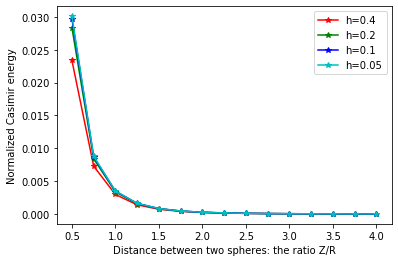

In [38]:
plt.plot(surf_dist,casimir_energy_04, 'r*-')
plt.plot(surf_dist,casimir_energy_02, 'g*-')
plt.plot(surf_dist,casimir_energy_01, 'b*-')
plt.plot(surf_dist,casimir_energy_005, 'c*-')

plt.xlabel('Distance between two spheres: the ratio Z/R')
plt.ylabel('Normalized Casimir energy')
plt.legend(['h=0.4', 'h=0.2', 'h=0.1','h=0.05'])
plt.savefig('Casimir_with_refinement.pdf',bbox_inches='tight')

In [16]:
casimir_energy_005

array([3.01070367e-02, 8.78990826e-03, 3.49519045e-03, 1.62156316e-03,
       8.28186280e-04, 4.53832624e-04, 2.62921398e-04, 1.59400732e-04,
       1.00365052e-04, 6.52442808e-05, 4.35850103e-05, 2.98142403e-05,
       2.08208543e-05, 1.48075867e-05, 1.07048111e-05])

In [6]:
casimir_energy_03

array([2.71209993e-02, 8.12598412e-03, 3.26542484e-03, 1.52298981e-03,
       7.80381734e-04, 4.28654511e-04, 2.48793147e-04, 1.51042068e-04,
       9.51998788e-05, 6.19415296e-05, 4.14077529e-05, 2.83382021e-05,
       1.97931311e-05, 1.40818843e-05, 1.01819771e-05])

In [30]:
casimir_energy_04

array([2.33769652e-02, 7.27765513e-03, 2.97035751e-03, 1.39653942e-03,
       7.19312823e-04, 3.96566332e-04, 2.30730983e-04, 1.40379487e-04,
       8.86340446e-05, 5.77451401e-05, 3.86453044e-05, 2.64724110e-05,
       1.85079480e-05, 1.31757091e-05, 9.53233517e-06])

In [31]:
casimir_energy_02

array([2.83836736e-02, 8.40653065e-03, 3.36327793e-03, 1.56573714e-03,
       8.01028661e-04, 4.39563872e-04, 2.54927375e-04, 1.54714501e-04,
       9.74735517e-05, 6.33936732e-05, 4.23623031e-05, 2.89855803e-05,
       2.02470226e-05, 1.44003978e-05, 1.04110759e-05])

In [32]:
casimir_energy_01

array([2.97387886e-02, 8.70890931e-03, 3.46742512e-03, 1.60973515e-03,
       8.22549982e-04, 4.50869443e-04, 2.61257482e-04, 1.58417285e-04,
       9.97564184e-05, 6.48524959e-05, 4.33256452e-05, 2.96360799e-05,
       2.06949102e-05, 1.47176376e-05, 1.06388215e-05])

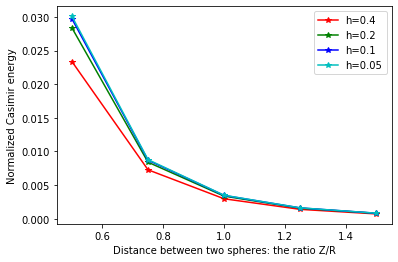

In [25]:
plt.plot(surf_dist[0:5],casimir_energy_04[0:5], 'r*-')
plt.plot(surf_dist[0:5],casimir_energy_02[0:5], 'g*-')
plt.plot(surf_dist[0:5],casimir_energy_01[0:5], 'b*-')
plt.plot(surf_dist[0:5],casimir_energy_005[0:5], 'c*-')

plt.xlabel('Distance between two spheres: the ratio Z/R')
plt.ylabel('Normalized Casimir energy')
plt.legend(['h=0.4', 'h=0.2', 'h=0.1', 'h=0.05'])
plt.savefig('Casimir_with_refinement1.pdf',bbox_inches='tight')

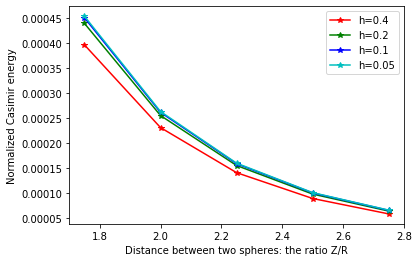

In [27]:
plt.plot(surf_dist[5:10],casimir_energy_04[5:10], 'r*-')
plt.plot(surf_dist[5:10],casimir_energy_02[5:10], 'g*-')
plt.plot(surf_dist[5:10],casimir_energy_01[5:10], 'b*-')
plt.plot(surf_dist[5:10],casimir_energy_005[5:10], 'c*-')

plt.xlabel('Distance between two spheres: the ratio Z/R')
plt.ylabel('Normalized Casimir energy')
plt.legend(['h=0.4', 'h=0.2', 'h=0.1','h=0.05'])
plt.savefig('Casimir_with_refinement2.pdf',bbox_inches='tight')

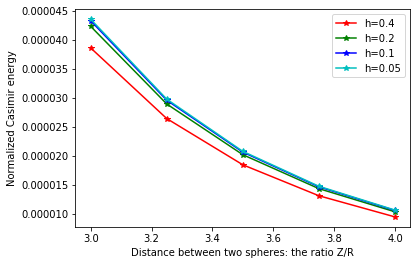

In [29]:
plt.plot(surf_dist[10:],casimir_energy_04[10:], 'r*-')
plt.plot(surf_dist[10:],casimir_energy_02[10:], 'g*-')
plt.plot(surf_dist[10:],casimir_energy_01[10:], 'b*-')
plt.plot(surf_dist[10:],casimir_energy_005[10:], 'c*-')

plt.xlabel('Distance between two spheres: the ratio Z/R')
plt.ylabel('Normalized Casimir energy')
plt.legend(['h=0.4', 'h=0.2', 'h=0.1','h=0.05'])
plt.savefig('Casimir_with_refinement3.pdf',bbox_inches='tight')

In [4]:
ce_005 = [3.01070367e-02, 8.78990826e-03, 3.49519045e-03, 1.62156316e-03,
       8.28186280e-04, 4.53832624e-04, 2.62921398e-04, 1.59400732e-04,
       1.00365052e-04, 6.52442808e-05, 4.35850103e-05, 2.98142403e-05,
       2.08208543e-05, 1.48075867e-05, 1.07048111e-05]
ce_01 = [2.97387886e-02, 8.70890931e-03, 3.46742512e-03, 1.60973515e-03,
       8.22549982e-04, 4.50869443e-04, 2.61257482e-04, 1.58417285e-04,
       9.97564184e-05, 6.48524959e-05, 4.33256452e-05, 2.96360799e-05,
       2.06949102e-05, 1.47176376e-05, 1.06388215e-05]
ce_02 = [2.83836736e-02, 8.40653065e-03, 3.36327793e-03, 1.56573714e-03,
       8.01028661e-04, 4.39563872e-04, 2.54927375e-04, 1.54714501e-04,
       9.74735517e-05, 6.33936732e-05, 4.23623031e-05, 2.89855803e-05,
       2.02470226e-05, 1.44003978e-05, 1.04110759e-05]
ce_04 = [2.33769652e-02, 7.27765513e-03, 2.97035751e-03, 1.39653942e-03,
       7.19312823e-04, 3.96566332e-04, 2.30730983e-04, 1.40379487e-04,
       8.86340446e-05, 5.77451401e-05, 3.86453044e-05, 2.64724110e-05,
       1.85079480e-05, 1.31757091e-05, 9.53233517e-06]

ce_03 = [2.71209993e-02, 8.12598412e-03, 3.26542484e-03, 1.52298981e-03,
       7.80381734e-04, 4.28654511e-04, 2.48793147e-04, 1.51042068e-04,
       9.51998788e-05, 6.19415296e-05, 4.14077529e-05, 2.83382021e-05,
       1.97931311e-05, 1.40818843e-05, 1.01819771e-05]

In [9]:
alpha = []
for i in range(len(ce_005)):
    alpha.append( math.log(abs(ce_005[i] - ce_02[i])/abs(ce_005[i] - ce_01[i]), 2))

In [3]:
alpha

[2.2264767121676674,
 2.242790971876432,
 2.248225051227528,
 2.2387303375427177,
 2.268537202841845,
 2.267640498415532,
 2.2643391203284944,
 2.2525088613364823,
 2.248172365755304,
 2.2398653207132386,
 2.2370226953899564,
 2.2176035816183792,
 2.187844129742725,
 2.1785174824271216,
 2.154205584666233]

In [4]:
beta = []
for i in range(len(ce_005)):
    beta.append( math.log(abs(ce_005[i] - ce_04[i])/abs(ce_005[i] - ce_02[i]), 2))

In [5]:
beta

[1.9653951331673618,
 1.979861658346454,
 1.9922767711469378,
 2.011067602814815,
 2.003223368191293,
 2.0048270351245963,
 2.0096375474859713,
 2.0211117018629197,
 2.02043675317384,
 2.0187262709688665,
 2.014346184209908,
 2.011785853629511,
 2.0110072472247027,
 2.002762712036464,
 1.9969702379752827]

In [5]:
alpha_04 = []
for i in range(len(ce_005)):
    alpha_04.append(abs(ce_005[i] - ce_04[i]))
    
alpha_02 = []
for i in range(len(ce_005)):
    alpha_02.append(abs(ce_005[i] - ce_02[i]))
    
    
alpha_03 = []
for i in range(len(ce_005)):
    alpha_03.append(abs(ce_005[i] - ce_03[i]))
    
alpha_01 = []
for i in range(len(ce_005)):
    alpha_01.append(abs(ce_005[i] - ce_01[i]))

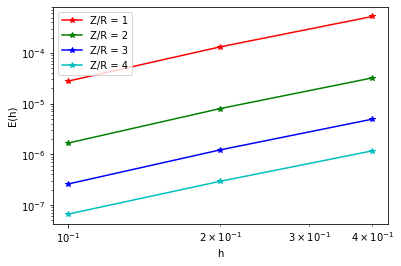

In [11]:
x_axis = [0.1, 0.2, 0.4]
plt.loglog(x_axis, [alpha_01[2], alpha_02[2], alpha_04[2]], 'r*-')
plt.loglog(x_axis, [alpha_01[6], alpha_02[6], alpha_04[6]], 'g*-')
plt.loglog(x_axis, [alpha_01[10], alpha_02[10],  alpha_04[10]], 'b*-')
plt.loglog(x_axis, [alpha_01[14], alpha_02[14],  alpha_04[14]], 'c*-')
plt.legend(['Z/R = 1', 'Z/R = 2','Z/R = 3', 'Z/R = 4'])
plt.xlabel('h')
plt.ylabel('E(h)')
plt.savefig('Rate of convergence.pdf')

In [16]:
np.log(alpha_04[2]/alpha_01[2])/np.log(0.4/0.1)

2.1202509111872327